In [1]:
import csv, math
import pandas as pd
import numpy as np
from datetime import timedelta
import time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import plotly.express as px

In [2]:
pf = pd.read_html('https://www.nbastuffer.com/2020-2021-nba-player-stats/', index_col=0, header=0, 
                    skiprows=[21])[0]

In [3]:
pf.head()

,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
RANK,,,,,,,,,,,,,,,,,,,,,
NaN,Pat Connaughton,Mil,G,28.54,23,23.7,49.4,10.7,8.8,13,...,4.4,9.9,0.9,4.8,0.43,0.26,0.52,5.1,129.0,107.6
NaN,Bryn Forbes,Mil,G,28.00,20,13.7,28.5,19.2,5.7,8,...,1.4,5.3,0.3,3.1,0.10,0.10,0.35,4.1,110.1,110.5
NaN,Jrue Holiday,Mil,G,31.11,23,39.6,82.6,22.1,11.9,56,...,5.7,7.8,8.7,31.4,1.65,0.43,2.43,9.6,108.9,108.4
NaN,Brook Lopez,Mil,C,33.30,23,29.0,60.4,16.8,9.6,43,...,5.9,10.9,0.3,1.3,0.74,1.48,1.09,3.9,122.1,106.8
NaN,Khris Middleton,Mil,F,29.94,23,40.1,83.5,26.4,13.0,97,...,7.6,10.1,5.1,19.6,1.52,0.17,3.22,9.7,107.8,106.3


In [4]:
pf.reset_index()

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,NaN,Pat Connaughton,Mil,G,28.54,23,23.7,49.4,10.7,8.8,...,4.4,9.9,0.9,4.8,0.43,0.26,0.52,5.1,129.0,107.6
1,NaN,Bryn Forbes,Mil,G,28.00,20,13.7,28.5,19.2,5.7,...,1.4,5.3,0.3,3.1,0.10,0.10,0.35,4.1,110.1,110.5
2,NaN,Jrue Holiday,Mil,G,31.11,23,39.6,82.6,22.1,11.9,...,5.7,7.8,8.7,31.4,1.65,0.43,2.43,9.6,108.9,108.4
3,NaN,Brook Lopez,Mil,C,33.30,23,29.0,60.4,16.8,9.6,...,5.9,10.9,0.3,1.3,0.74,1.48,1.09,3.9,122.1,106.8
4,NaN,Khris Middleton,Mil,F,29.94,23,40.1,83.5,26.4,13.0,...,7.6,10.1,5.1,19.6,1.52,0.17,3.22,9.7,107.8,106.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,Anthony Tolliver,Phi,F,36.14,1,1.7,3.5,0.0,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN
234,NaN,Rayjon Tucker,Phi,G,23.82,1,1.7,3.5,22.3,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN
235,NaN,Justise Winslow,Mem,F-G,25.32,1,2.8,5.8,0.0,NaN,...,1.0,19.7,1.0,38.8,0.00,0.00,0.00,0.0,NaN,NaN
236,NaN,Cassius Winston,Was,G,23.39,1,5.5,11.5,38.0,40.0,...,2.0,19.8,1.0,27.4,0.00,0.00,2.00,11.5,61.3,98.6


In [5]:
pf.reset_index()

,RANK,FULL NAME,TEAM,POS,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,NaN,Pat Connaughton,Mil,G,28.54,23,23.7,49.4,10.7,8.8,...,4.4,9.9,0.9,4.8,0.43,0.26,0.52,5.1,129.0,107.6
1,NaN,Bryn Forbes,Mil,G,28.00,20,13.7,28.5,19.2,5.7,...,1.4,5.3,0.3,3.1,0.10,0.10,0.35,4.1,110.1,110.5
2,NaN,Jrue Holiday,Mil,G,31.11,23,39.6,82.6,22.1,11.9,...,5.7,7.8,8.7,31.4,1.65,0.43,2.43,9.6,108.9,108.4
3,NaN,Brook Lopez,Mil,C,33.30,23,29.0,60.4,16.8,9.6,...,5.9,10.9,0.3,1.3,0.74,1.48,1.09,3.9,122.1,106.8
4,NaN,Khris Middleton,Mil,F,29.94,23,40.1,83.5,26.4,13.0,...,7.6,10.1,5.1,19.6,1.52,0.17,3.22,9.7,107.8,106.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,NaN,Anthony Tolliver,Phi,F,36.14,1,1.7,3.5,0.0,NaN,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN
234,NaN,Rayjon Tucker,Phi,G,23.82,1,1.7,3.5,22.3,0.0,...,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,NaN,NaN
235,NaN,Justise Winslow,Mem,F-G,25.32,1,2.8,5.8,0.0,NaN,...,1.0,19.7,1.0,38.8,0.00,0.00,0.00,0.0,NaN,NaN
236,NaN,Cassius Winston,Was,G,23.39,1,5.5,11.5,38.0,40.0,...,2.0,19.8,1.0,27.4,0.00,0.00,2.00,11.5,61.3,98.6


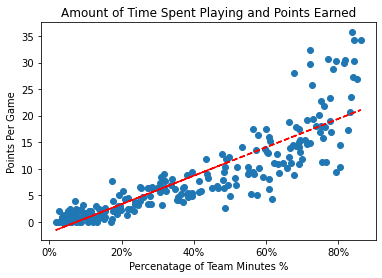

In [6]:
import matplotlib.ticker as ticker
#fig1 = pf.plot.scatter(x = 'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor',y ='PPGPointsPoints per game.')
x = pf['MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor']
y = pf['PPGPointsPoints per game.']
plt.scatter(x, y)
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.xlabel('Percenatage of Team Minutes %') 
plt.ylabel('Points Per Game') 
plt.title("Amount of Time Spent Playing and Points Earned")
plt.gca().xaxis.set_major_formatter(ticker.PercentFormatter())
plt.show()


In [7]:
pf_team = pf.groupby('TEAM').sum()
pf_team = pf_team.reset_index()
pf_team.head(16)
pf_team = pf_team.reindex([9, 12, 0, 5, 14, 11, 4, 2, 7, 15, 3, 10, 13, 8, 1, 6])

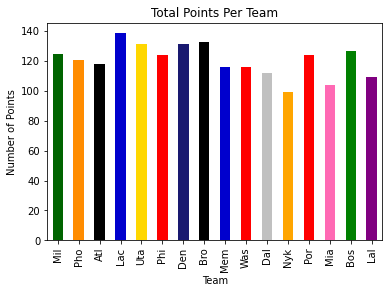

In [8]:
fig2 = pf_team.plot.bar(x= 'TEAM', y='PPGPointsPoints per game.',\
                        color=['darkgreen', 'darkorange', 'black', 'mediumblue', 'gold', 'red', 'midnightblue', 'black',\
                             'mediumblue', 'red', 'silver', 'orange', 'red', 'hotpink', 'green', 'purple'], \
                        title='Total Points Per Team' )
fig2.set_ylabel('Number of Points')
fig2.set_xlabel('Team')
fig2.get_legend().remove()

In [9]:
pf_team2 = pf.groupby('TEAM').mean()
pf_team2 = pf_team2.reset_index()
list(pf.columns)
pf_team2.head(12)

,TEAM,AGE,GP,MPG,MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor,"USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor",TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions,FTA,FT%,2PA,...,RPGReboundsRebounds per game.,TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,APGAssistsAssists per game.,AST%Assist PercentageAssist percentage is an estimated percentage of teammate field goals a player assisted while the player is on the court,SPGStealsSteals per game.,BPGBlocksBlocks per game.,TOPGTurnoversTurnovers per game.,"VIVersatility IndexVersatility index is a metric that measures a player’s ability to produce in points, assists, and rebounds. The average player will score around a five on the index, while top players score above 10",ORTGOffensive RatingIndividual offensive rating is the number of points produced by a player per 100 total individual possessions.,DRTGDefensive RatingIndividual defensive rating estimates how many points the player allowed per 100 possessions he individually faced while staying on the court.
0,Atl,25.635333,12.000000,18.293333,38.113333,17.826667,11.886667,21.600000,0.615133,57.133333,...,3.120000,9.486667,1.546667,10.426667,0.563333,0.375333,0.958667,4.940000,101.816667,105.250000
1,Bos,25.370000,3.687500,17.187500,35.800000,19.156250,9.593333,8.562500,0.686750,16.125000,...,3.031250,14.112500,1.475000,11.956250,0.452500,0.546875,0.876250,4.637500,109.216667,108.833333
2,Bro,28.084667,9.066667,19.093333,39.793333,19.066667,11.373333,16.200000,0.554800,40.400000,...,3.353333,10.446667,1.826667,11.593333,0.579333,0.366667,0.866667,6.346667,114.576923,105.323077
3,Dal,27.601538,5.538462,20.300000,42.238462,16.438462,8.558333,10.769231,0.655000,27.461538,...,3.546154,10.230769,1.653846,10.838462,0.447692,0.180769,0.829231,5.584615,109.275000,108.138462
4,Den,27.260667,7.800000,18.513333,38.560000,18.053333,10.640000,13.933333,0.664600,35.800000,...,3.313333,10.340000,1.886667,15.600000,0.465333,0.366000,0.802000,6.946667,116.538462,108.376923
5,Lac,28.586875,13.125000,17.862500,37.225000,18.400000,8.520000,28.187500,0.624875,54.125000,...,3.118750,10.293750,1.606250,12.862500,0.536875,0.405000,0.740625,6.368750,124.758333,105.383333
6,Lal,29.804667,4.666667,18.353333,38.213333,17.233333,11.128571,9.800000,0.630000,20.066667,...,3.366667,9.846667,1.400000,10.040000,0.502000,0.306000,0.974000,4.553333,97.271429,100.764286
7,Mem,24.733077,4.000000,19.207692,40.030769,15.869231,7.441667,7.846154,0.437154,24.153846,...,3.346154,10.753846,1.761538,11.823077,0.625385,0.392308,0.810000,5.161538,107.263636,108.063636
8,Mia,28.496429,3.428571,18.507143,38.521429,18.250000,13.614286,5.785714,0.490214,15.285714,...,3.164286,7.950000,1.607143,11.657143,0.553571,0.280000,1.011429,5.164286,101.666667,104.808333
9,Mil,27.388824,14.588235,17.135294,35.670588,17.947059,11.217647,28.117647,0.557588,75.941176,...,3.594118,11.352941,1.570588,9.370588,0.587059,0.295294,0.882353,5.658824,102.830769,105.623077


In [10]:
list(pf_team2.columns)


['TEAM',
 'AGE',
 'GP',
 'MPG',
 'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor',
 'USG%Usage RateUsage rate, a.k.a., usage percentage is an estimate of the percentage of team plays used by a player while he was on the floor',
 'TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions',
 'FTA',
 'FT%',
 '2PA',
 '2P%',
 '3PA',
 '3P%',
 'eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA',
 'TS%True Shooting PercentageTrue shooting percentage is a measure of shooting efficiency that takes into account field goals, 3-point field goals, and free throws.',
 'PPGPointsPoints per game.',
 'RPGReboundsRebounds per game.',
 'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.',
 'APGAssistsAssists per game.',

In [11]:
pf_team2 = pf_team2[['TEAM', 'FT%', '2P%', '3P%', 'eFG%Effective Shooting PercentageWith eFG%, \
three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA', \
'TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed \
by the player while the player is on the court.','TO%Turnover RateA metric that estimates the number of turnovers \
a player commits per 100 possessions']]
pf_team22 = pf_team2.loc[(pf_team2['TEAM'] == 'Mil') | (pf_team2['TEAM'] == 'Pho')]

In [12]:
pf_team22.head()

,TEAM,FT%,2P%,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA",TRB%Total Rebound PercentageTotal rebound percentage is estimated percentage of available rebounds grabbed by the player while the player is on the court.,TO%Turnover RateA metric that estimates the number of turnovers a player commits per 100 possessions
9,Mil,0.557588,0.484647,0.273588,0.453000,11.352941,11.217647
12,Pho,0.539750,0.524438,0.285750,0.530063,9.562500,8.950000


In [13]:
def turn_to_percent(df, colname):
    df[colname] = df[colname] * 100
    return df

pf_team22 = turn_to_percent(pf_team22, 'FT%')
pf_team22 = turn_to_percent(pf_team22, '2P%') 
pf_team22 = turn_to_percent(pf_team22, '3P%')
pf_team22 = turn_to_percent(pf_team22, 'eFG%Effective Shooting PercentageWith eFG%, \
three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA')

<ipython-input-13-a3b55e33a0d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname] = df[colname] * 100


In [14]:

listOfDFRows = pf_team22.to_numpy().tolist()
mil_means1 = listOfDFRows[0]
mil_means1.pop(0)
pho_means1 = listOfDFRows[1]
pho_means1.pop(0)

print(mil_means1, pho_means1)


[55.75882352941177, 48.464705882352945, 27.35882352941176, 45.29999999999999, 11.352941176470587, 11.21764705882353] [53.974999999999994, 52.44375000000001, 28.575000000000006, 53.00625000000001, 9.562499999999998, 8.95]


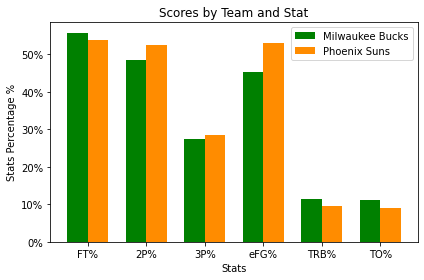

In [15]:
import matplotlib.ticker as mtick
labels = ['FT%', '2P%', '3P%', 'eFG%', 'TRB%', 'TO%']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, mil_means1, width, label='Milwaukee Bucks', color = 'green')
rects2 = ax.bar(x + width/2, pho_means1, width, label='Phoenix Suns', color = 'darkorange')

ax.set_ylabel('Stats Percentage %')
ax.set_xlabel('Stats')
ax.set_title('Scores by Team and Stat')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()
fig.tight_layout()

plt.show()

In [16]:
pf_player_short = pf[['FULL NAME', 'FT%', '2P%', '3P%', 'eFG%Effective Shooting PercentageWith eFG%, \
three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA', \
'MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor']]
dev_giannis = pf_player_short.loc[(pf_player_short['FULL NAME'] == 'Devin Booker') | (pf_player_short['FULL NAME'] == 'Giannis Antetokounmpo')]

In [17]:
dev_giannis = turn_to_percent(dev_giannis, 'FT%')
dev_giannis = turn_to_percent(dev_giannis, '2P%') 
dev_giannis = turn_to_percent(dev_giannis, '3P%')
dev_giannis = turn_to_percent(dev_giannis, 'eFG%Effective Shooting PercentageWith eFG%, \
three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA')


<ipython-input-13-a3b55e33a0d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[colname] = df[colname] * 100


In [18]:
dev_giannis.head()

,FULL NAME,FT%,2P%,3P%,"eFG%Effective Shooting PercentageWith eFG%, three-point shots made are worth 50% more than two-point shots made. eFG% Formula=(FGM+ (0.5 x 3PM))/FGA",MIN%Minutes PercentagePercentage of team minutes used by a player while he was on the floor
RANK,,,,,,
NaN,Devin Booker,90.5,49.9,32.1,49.4,84.1
NaN,Giannis Antetokounmpo,58.7,64.2,18.6,58.4,79.3


In [19]:
listOfDFRows = dev_giannis.to_numpy().tolist()
dev = listOfDFRows[0]
dev.pop(0)
giannis = listOfDFRows[1]
giannis.pop(0)

print(dev, giannis)

[90.5, 49.9, 32.1, 49.4, 84.1] [58.699999999999996, 64.2, 18.6, 58.4, 79.3]


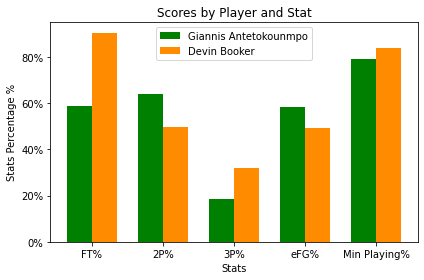

In [20]:
import matplotlib.ticker as mtick
labels = ['FT%', '2P%', '3P%', 'eFG%', 'Min Playing%']
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, giannis, width, label='Giannis Antetokounmpo', color = 'green')
rects2 = ax.bar(x + width/2, dev, width, label='Devin Booker', color = 'darkorange')

ax.set_ylabel('Stats Percentage %')
ax.set_xlabel('Stats')
ax.set_title('Scores by Player and Stat')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend()
fig.tight_layout()

plt.show()